We will use the 2015-2016 wave of the NHANES data for our analysis.

For our **population proportions**, we will analyze the difference of proportion between female and male smokers.  The column that specifies smoker and non-smoker is "SMQ020" in our dataset.

For our **population means**, we will analyze the difference of mean of body mass index within our female and male populations.  The column that includes the body mass index value is "BMXBMI".

Additionally, the gender is specified in the column "RIAGENDR".

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

### Loading the Dataset

In [2]:
df = pd.read_csv('nhanes_2015_2016.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


### Data Analysis

In [3]:
df.shape

(5735, 28)

In [5]:
# Let's first have a look at 'SMQ020' column
df.loc[:,'SMQ020'].value_counts()
# 1 -> "YES" Smoker
# 2 -> "NO" Non-Smoker

2    3406
1    2319
9       8
7       2
Name: SMQ020, dtype: int64

In [6]:
# Let's make rows with 1 as "YES", 2 as "NO" and 7,9 as NaN for our analysis purposes.
df.loc[:,'SMQ020x'] = df.loc[:,'SMQ020'].replace({1:"YES", 2:"NO", 7:np.nan, 9:np.nan})
df.loc[:,'SMQ020x'].value_counts()

NO     3406
YES    2319
Name: SMQ020x, dtype: int64

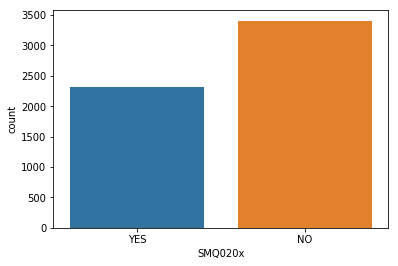

In [9]:
sns.countplot(x='SMQ020x',data=df)

In [7]:
df.loc[:,'RIAGENDR'].value_counts()

2    2976
1    2759
Name: RIAGENDR, dtype: int64

In [8]:
# Let's also replace in 'RIAGENDR', Gender Column 1:Male and 2:Female 
df.loc[:,'RIAGENDRx'] = df.loc[:,'RIAGENDR'].replace({1:'MALE', 2:'FEMALE'})
df.loc[:,'RIAGENDRx'].value_counts()

FEMALE    2976
MALE      2759
Name: RIAGENDRx, dtype: int64

In [18]:
pd.crosstab(df.SMQ020x, df.RIAGENDRx)

RIAGENDRx,FEMALE,MALE
SMQ020x,,
NO,2066,1340
YES,906,1413


In [22]:
pd.crosstab(df.SMQ020x, df.RIAGENDRx).apply(lambda x: x*100/x.sum(), axis=0)

RIAGENDRx,FEMALE,MALE
SMQ020x,,
NO,69.515478,48.674174
YES,30.484522,51.325826


* 69.51% Females are non-smokers
* 30.48% Females are smokers
* 48.67% Males are non-smokers
* 51.32% Males are smokers

In [23]:
pd.crosstab(df.SMQ020x, df.RIAGENDRx).apply(lambda x: x*100/x.sum(), axis=1)

RIAGENDRx,FEMALE,MALE
SMQ020x,,
NO,60.657663,39.342337
YES,39.068564,60.931436


* **Non-Smokers** 60.66% are Females and 39.34% Males
* **Smokers:** 39.07% are Females and 60.93% Males

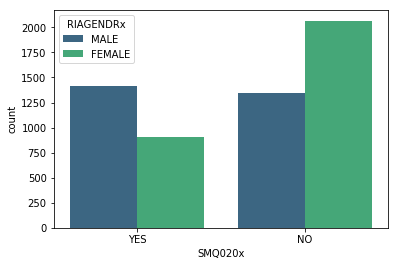

In [12]:
sns.countplot(x='SMQ020x',hue='RIAGENDRx',data=df,palette='viridis')

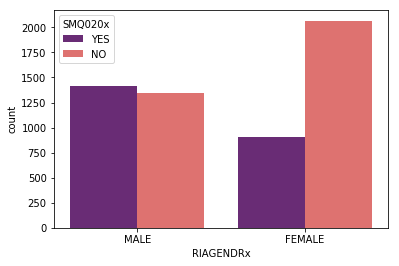

In [14]:
sns.countplot(x='RIAGENDRx',hue='SMQ020x',data=df, palette='magma')
# From this plot we can see that Majority of the females are Non-Smokers while there is almost 
# an equal propotion of males who Smoke and those who don't.

# Constructing Confidence Intervals

Now that we have the population proportions of male and female smokers, we can begin to calculate confidence intervals. We know that the equation is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** from the sample and the *Margin of Error* is the **t-multiplier**.

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

The Standard Error is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Lastly, the standard error for difference of population proportions and means is:

$$Standard\ Error\ for\ Difference\ of\ Two\ Population\ Proportions\ Or\ Means = \sqrt{SE_{Proportion\ 1}^2 + SE_{Proportion\ 2} ^2}$$

#### Difference of two Population Proportions

In [24]:
p = .304845
n = 2972
se_female = np.sqrt(p * (1 - p)/n)
se_female

0.00844415041930423

In [25]:
p = .513258
n = 2753
se_male = np.sqrt(p * (1 - p)/ n)
se_male

0.009526078787008965

In [26]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729880335656654

In [27]:
d = .304845 - .513258
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff
(lcb, ucb)

(-0.23336356545788706, -0.18346243454211297)

#### Difference of Two Population Means

In [29]:
df["BMXBMI"].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [31]:
df.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
FEMALE     29.939946  7.753319  2976.0
MALE       28.778072  6.252568  2759.0

In [32]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)
(sem_female, sem_male)

(0.14212523289878048, 0.11903716451870151)

In [33]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff

0.18538993598139303

In [34]:
d = 29.939946 - 28.778072

In [35]:
lcb = d - 1.96 * sem_diff
ucb = d + 1.96 * sem_diff
(lcb, ucb)

(0.798509725476467, 1.5252382745235278)